In [1]:
'''Location: primarily because there is a stipulation form Reserve Bank of India (RBI) as to how many bank branches could be located in a certain area. The RBI has list of unbanked areas that need immediate attention from banks. Thought the RBI earlier had a strict requirement about branch licensing, however, now RBI has given he banks full freedom to open branches. The location is alo important because of other factors are invariably related to it.
Population: How many people are going to be served by opening of a bank branch. Are teh people underserved or over served by banks?
Target market profile/Demographics: How many people are home owners, business owners, salaried people, age group etc also aid in deciding the branch viability'''

'Location: primarily because there is a stipulation form Reserve Bank of India (RBI) as to how many bank branches could be located in a certain area. The RBI has list of unbanked areas that need immediate attention from banks. Thought the RBI earlier had a strict requirement about branch licensing, however, now RBI has given he banks full freedom to open branches. The location is alo important because of other factors are invariably related to it.\nPopulation: How many people are going to be served by opening of a bank branch. Are teh people underserved or over served by banks?\nTarget market profile/Demographics: How many people are home owners, business owners, salaried people, age group etc also aid in deciding the branch viability'

In [2]:
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 50000000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import tensorflow as tf
#df1  = pd.read_csv('ALL_2017.csv',thousands=',',encoding='ISO-8859-1')

height has been deprecated.



In [3]:
df1  = pd.read_csv('ALL_2017.csv',thousands=',',encoding='ISO-8859-1')
df2  = pd.read_csv('ALL_2017_1.csv',thousands=',',encoding='ISO-8859-1')
df3  = pd.read_csv('ALL_2017_2.csv',thousands=',',encoding='ISO-8859-1')
df4  = pd.read_csv('ALL_2016.csv',thousands=',',encoding='ISO-8859-1')
df5  = pd.read_csv('ALL_2016_1.csv',thousands=',',encoding='ISO-8859-1')
df6  = pd.read_csv('ALL_2016_2.csv',thousands=',',encoding='ISO-8859-1')
df7  = pd.read_csv('ALL_2015.csv',thousands=',',encoding='ISO-8859-1')
df8  = pd.read_csv('ALL_2015_1.csv',thousands=',',encoding='ISO-8859-1')
df9  = pd.read_csv('ALL_2015_2.csv',thousands=',',encoding='ISO-8859-1')
df10 = pd.read_csv('ALL_2014.csv',thousands=',',encoding='ISO-8859-1')
df11 = pd.read_csv('ALL_2014_1.csv',thousands=',',encoding='ISO-8859-1')
df12 = pd.read_csv('ALL_2014_2.csv',thousands=',',encoding='ISO-8859-1')
df13 = pd.read_csv('ALL_2013.csv',thousands=',',encoding='ISO-8859-1')
df14 = pd.read_csv('ALL_2013_1.csv',thousands=',',encoding='ISO-8859-1')
df15 = pd.read_csv('ALL_2013_2.csv',thousands=',',encoding='ISO-8859-1')



/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#2017 df
df_17 = pd.concat([df1,df2,df3],axis=0)
df_17_rec = df_17[df_17.NAMEFULL.str.startswith('Wells Fargo')]
#2016 df
df_16 = pd.concat([df4,df5,df6],axis=0)
df_16_rec = df_16[df_16.NAMEFULL.str.startswith('Wells Fargo')]
#2015 df
df_15 = pd.concat([df7,df8,df9],axis=0)
df_15_rec = df_15[df_15.NAMEFULL.str.startswith('Wells Fargo')]
#2014 df
df_14 = pd.concat([df10,df11,df12],axis=0)
df_14_rec = df_14[df_14.NAMEFULL.str.startswith('Wells Fargo')]
#2013 df
df_13 = pd.concat([df13,df14,df15],axis=0)
df_13_rec = df_13[df_13.NAMEFULL.str.startswith('Wells Fargo')]

In [5]:

df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15],axis=0)


In [6]:
df = df[df.NAMEFULL.str.startswith('Wells Fargo')]


# Function to identify the geographical region of each state

In [7]:
def Identify_Region(data):

    DC = 'DOC'
    M = 'Midwest'
    N = 'Northeast'
    S = 'South'
    W = 'West'
    
    Midwest_Region = set(Midwest.lower() for Midwest in ("IL",
        "IN",
        "IA",
        "KS",
        "MI",
        "MN",
        "MO",
        "NE",
        "ND",
        "OH",
        "SD",
        "WI"))
    
    Northeast_Region = set(Northeast.lower() for Northeast in ("CT",
        "ME",
        "MA",
        "NH",
        "NJ",
        "NY",
        "PA",
        "RI",
        "VT"))
    
    South_Region = set(South.lower() for South in ("AL",
        "AR",
        "DE",
        "FL",
        "GA",
        "KY",
        "LA",
        "MD",
        "MS",
        "NC",
        "OK",
        "SC",
        "TN",
        "TX",
        "VA",
        "WV"))
    
    West_Region = set(West.lower() for West in ("AK",
        "AZ",
        "CA",
        "CO",
        "HI",
        "ID",
        "MT",
        "NV",
        "NM",
        "OR",
        "UT",
        "WA",
        "WY"))
    

    if data.lower() in Midwest_Region:
        return M
    
    if data.lower() in Northeast_Region :
        return N
    
    if data.lower() in South_Region:
        return S
    
    if data.lower() in West_Region:
        return W

    
    else:
        return DC 
    
    

In [8]:
df['Region'] = df['STALPBR'].apply(Identify_Region)
df.head(5)
#df.to_csv('Analysis.csv')

,ADDRESBR,ADDRESS,ASSET,BKCLASS,BKMO,BRCENM,BRNUM,BRSERTYP,CALL,CBSA_DIV_NAMB,CERT,CHARTER,CHRTAGNN,CHRTAGNT,CITY,CITY2BR,CITYBR,CITYHCR,CLCODE,CNTRYNA,CNTRYNAB,CNTYNAMB,CNTYNUMB,CONSOLD,CSABR,CSANAMBR,DENOVO,DEPDOM,DEPSUM,DEPSUMBR,DIVISIONB,DOCKET,ESCROW,FDICDBS,FDICNAME,FED,FEDNAME,HCTMULT,INSAGNT1,INSBRDD,INSBRTS,INSURED,METROBR,MICROBR,MSABR,MSANAMB,Metrobr,Microbr,NAMEBR,NAMEFULL,NAMEHCR,NECNAMB,NECTABR,OCCDIST,OCCNAME,PLACENUM,REGAGNT,RSSDHCR,RSSDID,SIMS_ACQUIRED_DATE,SIMS_DESCRIPTION,SIMS_ESTABLISHED_DATE,SIMS_LATITUDE,SIMS_LONGITUDE,SIMS_PROJECTION,SPECDESC,SPECGRP,STALP,STALPBR,STALPHCR,STCNTY,STCNTYBR,STNAME,STNAMEBR,STNUMBR,UNINUMBR,UNIT,USA,YEAR,ZIP,ZIPBR,Region
18058,1 California Street,101 N. Phillips Avenue,1731937000,N,0,NaN,603,11,CALL,San Francisco-Redwood City-South San Francisco...,3511,FED,Comptroller of the Currency,OCC,Sioux Falls,San Francisco,San Francisco,SAN FRANCISCO,3,United States,United States,San Francisco,75,NaN,488,"San Jose-San Francisco-Oakland, CA",0.0,1.237791e+09,0,17530265,41884,0,NaN,11,Kansas City,9,Minneapolis,MULT,DIF,NaN,NaN,CB,NaN,NaN,41860,"San Francisco-Oakland-Hayward, CA",1.0,0.0,Market-California Branch,"Wells Fargo Bank, National Association",WELLS FARGO & COMPANY,NaN,0,4,Midwest District,0.0,OCC,1120754,451965,05/30/1986,M,11/28/1922,37.7935,-122.3970,US_RoofTop,ALL OTHER > $1 BILLION,9,SD,CA,CA,46099,6075,South Dakota,California,6,188692,0.0,1,2017,57104,94111,West
18059,1 Eagle Road,101 N. Phillips Avenue,1731937000,N,0,NaN,7659,11,CALL,NaN,3511,FED,Comptroller of the Currency,OCC,Sioux Falls,Danbury,Danbury,SAN FRANCISCO,3,United States,United States,Fairfield,1,NaN,408,"New York-Newark, NY-NJ-CT-PA",0.0,1.237791e+09,0,114944,0,0,NaN,11,Kansas City,9,Minneapolis,MULT,DIF,NaN,NaN,CB,NaN,NaN,14860,"Bridgeport-Stamford-Norwalk, CT",1.0,0.0,Danbury Commerce Park Branch,"Wells Fargo Bank, National Association",WELLS FARGO & COMPANY,NaN,0,4,Midwest District,0.0,OCC,1120754,451965,03/20/2010,StreetAddress,11/01/1965,41.4094,-73.4149,100,ALL OTHER > $1 BILLION,9,SD,CT,CA,46099,9001,South Dakota,Connecticut,9,219689,0.0,1,2017,57104,6810,Northeast
18060,1 East 16th Street,101 N. Phillips Avenue,1731937000,N,0,NaN,5090,11,CALL,NaN,3511,FED,Comptroller of the Currency,OCC,Sioux Falls,Yuma,Yuma,SAN FRANCISCO,3,United States,United States,Yuma,27,NaN,0,NaN,0.0,1.237791e+09,0,169048,0,0,NaN,11,Kansas City,9,Minneapolis,MULT,DIF,NaN,NaN,CB,NaN,NaN,49740,"Yuma, AZ",1.0,0.0,Yuma Main Branch,"Wells Fargo Bank, National Association",WELLS FARGO & COMPANY,NaN,0,4,Midwest District,0.0,OCC,1120754,451965,02/20/2004,M,02/19/1951,32.6985,-114.6203,US_Streets,ALL OTHER > $1 BILLION,9,SD,AZ,CA,46099,4027,South Dakota,Arizona,4,194594,0.0,1,2017,57104,85364,West
18061,1 Independent Drive,101 N. Phillips Avenue,1731937000,N,0,NaN,8190,11,CALL,NaN,3511,FED,Comptroller of the Currency,OCC,Sioux Falls,Jacksonville,Jacksonville,SAN FRANCISCO,3,United States,United States,Duval,31,NaN,300,"Jacksonville-St. Marys-Palatka, FL-GA",0.0,1.237791e+09,0,2697073,0,0,NaN,11,Kansas City,9,Minneapolis,MULT,DIF,NaN,NaN,CB,NaN,NaN,27260,"Jacksonville, FL",1.0,0.0,Wells Fargo Center Branch,"Wells Fargo Bank, National Association",WELLS FARGO & COMPANY,NaN,0,4,Midwest District,0.0,OCC,1120754,451965,03/20/2010,M,02/26/1998,30.3252,-81.6585,100,ALL OTHER > $1 BILLION,9,SD,FL,CA,46099,12031,South Dakota,Florida,12,290076,0.0,1,2017,57104,32202,South
18062,1 Johannes Avenue,101 N. Phillips Avenue,1731937000,N,0,NaN,3672,11,CALL,NaN,3511,FED,Comptroller of the Currency,OCC,Sioux Falls,Big Sandy,Big Sandy,SAN FRANCISCO,3,United States,United States,Chouteau,15,NaN,0,NaN,0.0,1.237791e+09,0,23574,0,0,NaN,11,Kansas City,9,Minneapolis,MULT,DIF,NaN,NaN,CB,NaN,NaN,0,NaN,0.0,0.0,Big Sandy Branch,"Wells Fargo Bank, National Association",WELLS FARGO & COMPANY,NaN,0,4,Midwest District,0.0,OCC,1120754,451965,11/21/2003,STREETADDRESS,07/02/1910,48.1786,-110.1119,100,ALL OTHER > $1 BILLION,9,SD,MT,CA,46099,30015,South Dakota,Montana,30,

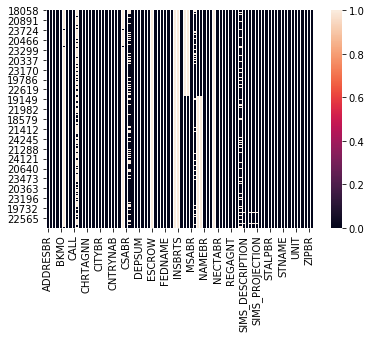

In [9]:
import seaborn as sb
%matplotlib inline
sb.heatmap(df.isnull())

In [10]:
df = df.dropna(axis=1, how='any')

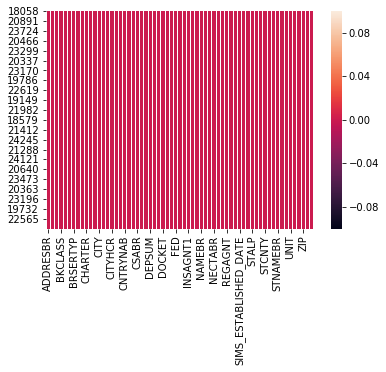

In [11]:
import seaborn as sb
%matplotlib inline
sb.heatmap(df.isnull())

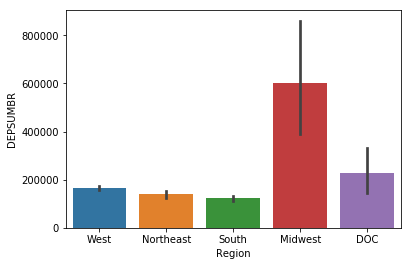

In [12]:
sb.barplot(x='Region',y='DEPSUMBR',data=df)

Text(0.5,1,'Midwest Deposits')

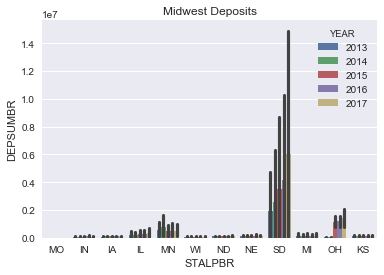

In [13]:
MW = df[(df['Region']) == 'Midwest']


import seaborn as sb
sb.set(style='darkgrid',font_scale=1)
sb.barplot(x="STALPBR", y="DEPSUMBR", hue="YEAR", data=MW).set_title('Midwest Deposits')



Text(0.5,1,'Northeast Deposits')

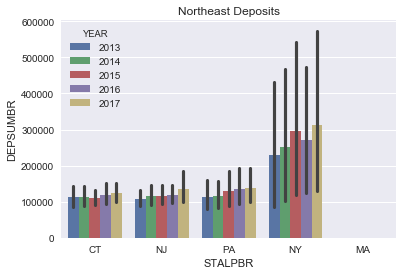

In [14]:
NE = df[(df['Region']) == 'Northeast']


import seaborn as sb
sb.set(style='darkgrid',font_scale=1)
sb.barplot(x="STALPBR", y="DEPSUMBR", hue="YEAR", data=NE).set_title('Northeast Deposits')

Text(0.5,1,'South Deposits')

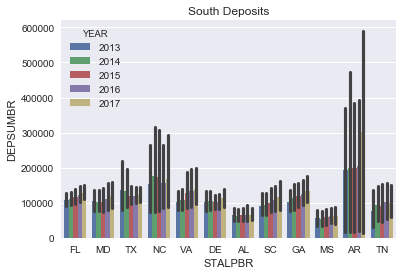

In [15]:
S = df[(df['Region']) == 'South']


import seaborn as sb
sb.set(style='darkgrid',font_scale=1)
sb.barplot(x="STALPBR", y="DEPSUMBR", hue="YEAR", data=S).set_title('South Deposits')

Text(0.5,1,'West Deposits')

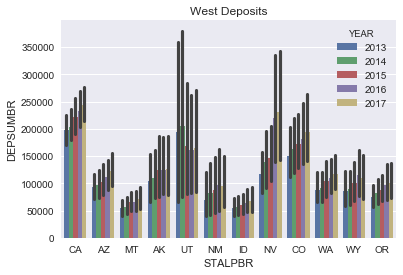

In [16]:
W = df[(df['Region']) == 'West']


import seaborn as sb
sb.set(style='darkgrid',font_scale=1)
sb.barplot(x="STALPBR", y="DEPSUMBR", hue="YEAR", data=W).set_title('West Deposits')

Text(0.5,1,'DOC Deposits')

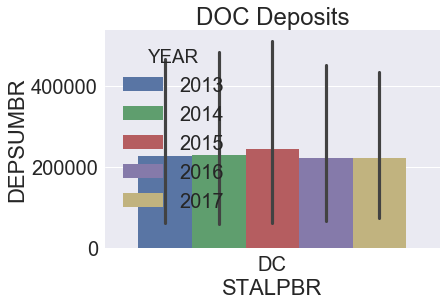

In [17]:
D = df[(df['Region']) == 'DOC']


import seaborn as sb
sb.set(style='darkgrid',font_scale=2)
sb.barplot(x="STALPBR", y="DEPSUMBR", hue="YEAR", data=D).set_title('DOC Deposits')

In [18]:
# Finding top counties peformance for all yaers and current year (Filter when current year)
MW_Analysis = MW.groupby(['YEAR','CNTYNAMB','STALPBR'])
MW_dict = {}

for name,group in MW_Analysis:
    
        Year    = name
        #y       = group.YEAR
       # c       = group.CNTYNAMB
       # s       = group.STALPBR
        Deposit = group.DEPSUMBR.sum()
        
        
        
        MW_dict[name] = [Year,Deposit]
             
                            
        
        MW_df = pd.DataFrame(MW_dict)


        print(  
                   ' Year    '+str(Year)
                 + ' Deposit '+str(Deposit)
                 )
                 
        
        
        
        

       
        
    
        
    
    

 Year    (2013, 'Adams', 'IN') Deposit 106702
 Year    (2013, 'Adams', 'NE') Deposit 631932
 Year    (2013, 'Allen', 'IN') Deposit 3407810
 Year    (2013, 'Anoka', 'MN') Deposit 1839922
 Year    (2013, 'Atchison', 'KS') Deposit 50026
 Year    (2013, 'Barnes', 'ND') Deposit 154384
 Year    (2013, 'Beadle', 'SD') Deposit 177510
 Year    (2013, 'Becker', 'MN') Deposit 169324
 Year    (2013, 'Beltrami', 'MN') Deposit 210218
 Year    (2013, 'Benton', 'IA') Deposit 69584
 Year    (2013, 'Benton', 'MN') Deposit 133336
 Year    (2013, 'Black Hawk', 'IA') Deposit 662654
 Year    (2013, 'Blue Earth', 'MN') Deposit 742172
 Year    (2013, 'Bowman', 'ND') Deposit 99264
 Year    (2013, 'Box Butte', 'NE') Deposit 57254
 Year    (2013, 'Brookings', 'SD') Deposit 144808
 Year    (2013, 'Brown', 'MN') Deposit 53964
 Year    (2013, 'Brown', 'SD') Deposit 654026
 Year    (2013, 'Brown', 'WI') Deposit 703674
 Year    (2013, 'Brule', 'SD') Deposit 145582
 Year    (2013, 'Buffalo', 'NE') Deposit 257146
 Year

 Year    (2014, 'Box Butte', 'NE') Deposit 60586
 Year    (2014, 'Brookings', 'SD') Deposit 161410
 Year    (2014, 'Brown', 'MN') Deposit 54940
 Year    (2014, 'Brown', 'SD') Deposit 640740
 Year    (2014, 'Brown', 'WI') Deposit 821812
 Year    (2014, 'Brule', 'SD') Deposit 149500
 Year    (2014, 'Buffalo', 'NE') Deposit 256212
 Year    (2014, 'Burleigh', 'ND') Deposit 1449012
 Year    (2014, 'Butte', 'SD') Deposit 120466
 Year    (2014, 'Carlton', 'MN') Deposit 122690
 Year    (2014, 'Carver', 'MN') Deposit 330822
 Year    (2014, 'Cass', 'IA') Deposit 1249646
 Year    (2014, 'Cass', 'ND') Deposit 1180510
 Year    (2014, 'Cerro Gordo', 'IA') Deposit 316196
 Year    (2014, 'Cherry', 'NE') Deposit 51516
 Year    (2014, 'Clay', 'MN') Deposit 554506
 Year    (2014, 'Clay', 'SD') Deposit 57186
 Year    (2014, 'Codington', 'SD') Deposit 264034
 Year    (2014, 'Cook', 'IL') Deposit 8238384
 Year    (2014, 'Crawford', 'IA') Deposit 127430
 Year    (2014, 'Crow Wing', 'MN') Deposit 296732
 Year

 Year    (2015, 'Hughes', 'SD') Deposit 147662
 Year    (2015, 'Huntington', 'IN') Deposit 67152
 Year    (2015, 'Iowa', 'WI') Deposit 55256
 Year    (2015, 'Iron', 'MI') Deposit 56868
 Year    (2015, 'Isanti', 'MN') Deposit 135416
 Year    (2015, 'Itasca', 'MN') Deposit 318072
 Year    (2015, 'Johnson', 'IA') Deposit 413032
 Year    (2015, 'Johnson', 'KS') Deposit 1601774
 Year    (2015, 'Kandiyohi', 'MN') Deposit 162732
 Year    (2015, 'Kane', 'IL') Deposit 121768
 Year    (2015, 'Kent', 'MI') Deposit 3888784
 Year    (2015, 'Knox', 'IL') Deposit 280602
 Year    (2015, 'Koochiching', 'MN') Deposit 73860
 Year    (2015, 'La Crosse', 'WI') Deposit 681258
 Year    (2015, 'La Porte', 'IN') Deposit 152638
 Year    (2015, 'Lagrange', 'IN') Deposit 83030
 Year    (2015, 'Lake', 'IL') Deposit 977130
 Year    (2015, 'Lake', 'MN') Deposit 84928
 Year    (2015, 'Lake', 'SD') Deposit 157054
 Year    (2015, 'Lake of the Woods', 'MN') Deposit 98140
 Year    (2015, 'Lancaster', 'NE') Deposit 261441

 Year    (2016, 'Hughes', 'SD') Deposit 162748
 Year    (2016, 'Huntington', 'IN') Deposit 72412
 Year    (2016, 'Iowa', 'WI') Deposit 58190
 Year    (2016, 'Iron', 'MI') Deposit 61818
 Year    (2016, 'Isanti', 'MN') Deposit 141774
 Year    (2016, 'Itasca', 'MN') Deposit 301326
 Year    (2016, 'Johnson', 'IA') Deposit 318568
 Year    (2016, 'Johnson', 'KS') Deposit 1723880
 Year    (2016, 'Kandiyohi', 'MN') Deposit 172590
 Year    (2016, 'Kane', 'IL') Deposit 142744
 Year    (2016, 'Kent', 'MI') Deposit 4147926
 Year    (2016, 'Knox', 'IL') Deposit 244616
 Year    (2016, 'Koochiching', 'MN') Deposit 68946
 Year    (2016, 'La Crosse', 'WI') Deposit 682802
 Year    (2016, 'La Porte', 'IN') Deposit 159780
 Year    (2016, 'Lagrange', 'IN') Deposit 86858
 Year    (2016, 'Lake', 'IL') Deposit 1265228
 Year    (2016, 'Lake', 'MN') Deposit 86072
 Year    (2016, 'Lake', 'SD') Deposit 161932
 Year    (2016, 'Lake of the Woods', 'MN') Deposit 83764
 Year    (2016, 'Lancaster', 'NE') Deposit 26850

 Year    (2017, 'Hennepin', 'MN') Deposit 134610296
 Year    (2017, 'Henry', 'IL') Deposit 172286
 Year    (2017, 'Houghton', 'MI') Deposit 188932
 Year    (2017, 'Hughes', 'SD') Deposit 167086
 Year    (2017, 'Huntington', 'IN') Deposit 75896
 Year    (2017, 'Iowa', 'WI') Deposit 60478
 Year    (2017, 'Iron', 'MI') Deposit 68040
 Year    (2017, 'Isanti', 'MN') Deposit 155762
 Year    (2017, 'Itasca', 'MN') Deposit 241420
 Year    (2017, 'Johnson', 'IA') Deposit 302856
 Year    (2017, 'Johnson', 'KS') Deposit 1890984
 Year    (2017, 'Kandiyohi', 'MN') Deposit 181084
 Year    (2017, 'Kane', 'IL') Deposit 162286
 Year    (2017, 'Kent', 'MI') Deposit 4228476
 Year    (2017, 'Knox', 'IL') Deposit 237362
 Year    (2017, 'Koochiching', 'MN') Deposit 70550
 Year    (2017, 'La Crosse', 'WI') Deposit 802246
 Year    (2017, 'La Porte', 'IN') Deposit 160134
 Year    (2017, 'Lagrange', 'IN') Deposit 91266
 Year    (2017, 'Lake', 'IL') Deposit 1180836
 Year    (2017, 'Lake', 'MN') Deposit 86356
 Ye

In [19]:
x = MW_df.T.reset_index()
x.head()
x.rename(columns={0: 'Year,County,State',
                  1: 'Deposit',
                 'level_0': 'Year',
                 'level_1': 'County',
                 'level_2': 'State'}, inplace=True)
x.sort_values('Deposit',ascending=False,inplace=True)
x


,Year,County,State,"Year,County,State",Deposit
809,2017,Minnehaha,SD,"(2017, Minnehaha, SD)",524621930
632,2016,Minnehaha,SD,"(2016, Minnehaha, SD)",386595216
456,2015,Minnehaha,SD,"(2015, Minnehaha, SD)",334205278
280,2014,Minnehaha,SD,"(2014, Minnehaha, SD)",242032126
234,2014,Hennepin,MN,"(2014, Hennepin, MN)",228364868
105,2013,Minnehaha,SD,"(2013, Minnehaha, SD)",183890046
61,2013,Hennepin,MN,"(2013, Hennepin, MN)",157514566
587,2016,Hennepin,MN,"(2016, Hennepin, MN)",145857592
764,2017,Hennepin,MN,"(2017, Hennepin, MN)",134610296
411,2015,Hennepin,MN,"(2015, Hennepin, MN)",132234224


In [20]:
y = x.sort_values('Deposit',ascending = False).groupby(['County']).head(5)
y.head(25)

,Year,County,State,"Year,County,State",Deposit
809,2017,Minnehaha,SD,"(2017, Minnehaha, SD)",524621930
632,2016,Minnehaha,SD,"(2016, Minnehaha, SD)",386595216
456,2015,Minnehaha,SD,"(2015, Minnehaha, SD)",334205278
280,2014,Minnehaha,SD,"(2014, Minnehaha, SD)",242032126
234,2014,Hennepin,MN,"(2014, Hennepin, MN)",228364868
105,2013,Minnehaha,SD,"(2013, Minnehaha, SD)",183890046
61,2013,Hennepin,MN,"(2013, Hennepin, MN)",157514566
587,2016,Hennepin,MN,"(2016, Hennepin, MN)",145857592
764,2017,Hennepin,MN,"(2017, Hennepin, MN)",134610296
411,2015,Hennepin,MN,"(2015, Hennepin, MN)",132234224


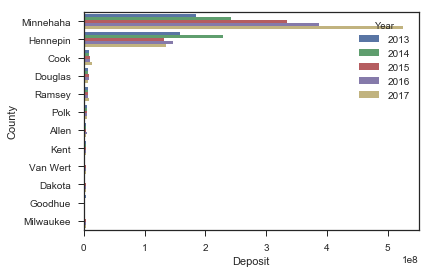

In [21]:
sb.set(style="ticks")

sb.barplot(x="Deposit", y="County", hue="Year" ,data=y.head(50))

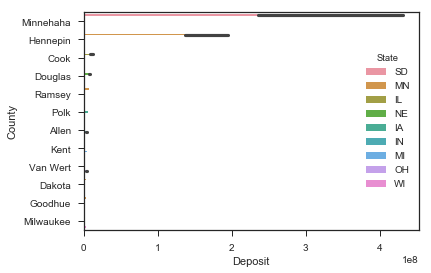

In [22]:
sb.set(style="ticks")

sb.barplot(x="Deposit", y="County", hue="State" ,data=y.head(50))

# Top Performers - County

In [23]:
county_analysis_17 = df_17_rec.groupby('CNTYNAMB')
county_analysis_16 = df_16_rec.groupby('CNTYNAMB')

state_dict = {}


for name,group in county_analysis_17:
        
        county           = name
        Deposit_17       = group.DEPSUMBR.sum()
        
        
for name,group in county_analysis_16:
        
        county           = name
        Deposit_16       = group.DEPSUMBR.sum()
        
        
        change = (Deposit_17 -  Deposit_16)/Deposit_17         
    
        state_dict[name] = [ 
                             Deposit_17,
                             
                             Deposit_16,
                             change]
        
        state_report = pd.DataFrame(state_dict)





        print(   
                   ' County   '+ str(county)
                 + ' Deposit_17 '+ str(Deposit_17)
                 + ' Deposit_16 '+ str(Deposit_16)
                 + ' Pct_change '+ str(change)) 
                
                

 County   Ada Deposit_17 1073470 Deposit_16 4556120 Pct_change -3.244291875879158
 County   Adams Deposit_17 1073470 Deposit_16 2774944 Pct_change -1.5850224039796175
 County   Aiken Deposit_17 1073470 Deposit_16 424236 Pct_change 0.6047993888976869
 County   Alachua Deposit_17 1073470 Deposit_16 1823182 Pct_change -0.6984005142202391
 County   Alamance Deposit_17 1073470 Deposit_16 983828 Pct_change 0.08350675845622141
 County   Alameda Deposit_17 1073470 Deposit_16 23253562 Pct_change -20.662051105294047
 County   Albany Deposit_17 1073470 Deposit_16 66574 Pct_change 0.9379824308084995
 County   Albemarle Deposit_17 1073470 Deposit_16 444888 Pct_change 0.5855608447371607
 County   Alexander Deposit_17 1073470 Deposit_16 90056 Pct_change 0.9161075763645001
 County   Alexandria (City) Deposit_17 1073470 Deposit_16 1852146 Pct_change -0.7253821718352632
 County   Allegheny Deposit_17 1073470 Deposit_16 660274 Pct_change 0.3849162063215553
 County   Allen Deposit_17 1073470 Deposit_16 47

 County   Charlotte Deposit_17 1073470 Deposit_16 1432740 Pct_change -0.33468098782453165
 County   Charlottesville (City) Deposit_17 1073470 Deposit_16 1204386 Pct_change -0.12195590002515208
 County   Chatham Deposit_17 1073470 Deposit_16 2578444 Pct_change -1.4019711775829786
 County   Chattahoochee Deposit_17 1073470 Deposit_16 97638 Pct_change 0.9090445005449617
 County   Chaves Deposit_17 1073470 Deposit_16 445916 Pct_change 0.5846032026977931
 County   Chelan Deposit_17 1073470 Deposit_16 482998 Pct_change 0.5500591539586575
 County   Cherokee Deposit_17 1073470 Deposit_16 1671986 Pct_change -0.557552609760869
 County   Cherry Deposit_17 1073470 Deposit_16 54384 Pct_change 0.9493381277539196
 County   Chesapeake (City) Deposit_17 1073470 Deposit_16 1013954 Pct_change 0.055442629975686324
 County   Chester Deposit_17 1073470 Deposit_16 4028980 Pct_change -2.753230178766058
 County   Chesterfield Deposit_17 1073470 Deposit_16 2836866 Pct_change -1.6427063634754582
 County   Choute

 County   Gem Deposit_17 1073470 Deposit_16 118586 Pct_change 0.8895302150968355
 County   Georgetown Deposit_17 1073470 Deposit_16 439790 Pct_change 0.5903099294810288
 County   Gila Deposit_17 1073470 Deposit_16 353358 Pct_change 0.6708263854602364
 County   Gloucester Deposit_17 1073470 Deposit_16 1038976 Pct_change 0.03213317558944358
 County   Glynn Deposit_17 1073470 Deposit_16 126330 Pct_change 0.8823162268158402
 County   Gogebic Deposit_17 1073470 Deposit_16 103586 Pct_change 0.9035035911576477
 County   Gonzales Deposit_17 1073470 Deposit_16 340830 Pct_change 0.6824969491462267
 County   Goochland Deposit_17 1073470 Deposit_16 248204 Pct_change 0.7687834778801457
 County   Goodhue Deposit_17 1073470 Deposit_16 289456 Pct_change 0.7303548305961042
 County   Gooding Deposit_17 1073470 Deposit_16 42320 Pct_change 0.9605764483404287
 County   Gordon Deposit_17 1073470 Deposit_16 132364 Pct_change 0.8766952034057776
 County   Grand Deposit_17 1073470 Deposit_16 254044 Pct_change 0

 County   Lebanon Deposit_17 1073470 Deposit_16 701304 Pct_change 0.3466943650032139
 County   Lee Deposit_17 1073470 Deposit_16 5290224 Pct_change -3.92815262652892
 County   Lehigh Deposit_17 1073470 Deposit_16 4003262 Pct_change -2.7292723597305932
 County   Lemhi Deposit_17 1073470 Deposit_16 64482 Pct_change 0.9399312509897808
 County   Lenoir Deposit_17 1073470 Deposit_16 277076 Pct_change 0.7418875236382945
 County   Leon Deposit_17 1073470 Deposit_16 1434374 Pct_change -0.3362031542567561
 County   Lewis Deposit_17 1073470 Deposit_16 206862 Pct_change 0.807295965420552
 County   Lewis and Clark Deposit_17 1073470 Deposit_16 688218 Pct_change 0.3588847382786664
 County   Lexington Deposit_17 1073470 Deposit_16 1364760 Pct_change -0.2713536475169311
 County   Lexington (City) Deposit_17 1073470 Deposit_16 165386 Pct_change 0.8459332817871016
 County   Liberty Deposit_17 1073470 Deposit_16 312062 Pct_change 0.7092960213140563
 County   Lincoln Deposit_17 1073470 Deposit_16 962716 

 County   Payette Deposit_17 1073470 Deposit_16 52162 Pct_change 0.9514080505277278
 County   Pennington Deposit_17 1073470 Deposit_16 1290586 Pct_change -0.20225623445461913
 County   Pershing Deposit_17 1073470 Deposit_16 48638 Pct_change 0.9546908623436147
 County   Person Deposit_17 1073470 Deposit_16 162800 Pct_change 0.8483422918199857
 County   Petersburg Deposit_17 1073470 Deposit_16 148852 Pct_change 0.8613356684397329
 County   Petersburg (City) Deposit_17 1073470 Deposit_16 218530 Pct_change 0.7964265419620483
 County   Philadelphia Deposit_17 1073470 Deposit_16 26396048 Pct_change -23.58946034821653
 County   Pickens Deposit_17 1073470 Deposit_16 564906 Pct_change 0.4737570681993908
 County   Pierce Deposit_17 1073470 Deposit_16 3055592 Pct_change -1.8464624069606044
 County   Pike Deposit_17 1073470 Deposit_16 568400 Pct_change 0.4705022031356256
 County   Pima Deposit_17 1073470 Deposit_16 8229342 Pct_change -6.666112699935723
 County   Pinal Deposit_17 1073470 Deposit_16

 County   Sherburne Deposit_17 1073470 Deposit_16 190326 Pct_change 0.8227002151899914
 County   Sheridan Deposit_17 1073470 Deposit_16 159828 Pct_change 0.8511108833968346
 County   Shoshone Deposit_17 1073470 Deposit_16 71086 Pct_change 0.9337792392894072
 County   Sierra Deposit_17 1073470 Deposit_16 18730 Pct_change 0.982551911092066
 County   Silver Bow Deposit_17 1073470 Deposit_16 220098 Pct_change 0.7949658583844914
 County   Sitka Deposit_17 1073470 Deposit_16 128674 Pct_change 0.8801326539167373
 County   Skagit Deposit_17 1073470 Deposit_16 408568 Pct_change 0.6193950459724072
 County   Skagway Deposit_17 1073470 Deposit_16 61648 Pct_change 0.9425712875068702
 County   Smyth Deposit_17 1073470 Deposit_16 115174 Pct_change 0.8927086923714682
 County   Snohomish Deposit_17 1073470 Deposit_16 2842200 Pct_change -1.6476752960026828
 County   Socorro Deposit_17 1073470 Deposit_16 114086 Pct_change 0.8937222279150792
 County   Solano Deposit_17 1073470 Deposit_16 1848904 Pct_chang

 County   Weber Deposit_17 1073470 Deposit_16 14940736 Pct_change -12.918168183554268
 County   Webster Deposit_17 1073470 Deposit_16 279686 Pct_change 0.7394561562037132
 County   Weld Deposit_17 1073470 Deposit_16 993894 Pct_change 0.07412969156101241
 County   Wells Deposit_17 1073470 Deposit_16 71686 Pct_change 0.9332203042469748
 County   Westchester Deposit_17 1073470 Deposit_16 8736664 Pct_change -7.138712772597278
 County   Whatcom Deposit_17 1073470 Deposit_16 577304 Pct_change 0.4622076071059275
 County   White Deposit_17 1073470 Deposit_16 129466 Pct_change 0.8793948596607264
 County   Whiteside Deposit_17 1073470 Deposit_16 93540 Pct_change 0.9128620268847756
 County   Whitfield Deposit_17 1073470 Deposit_16 802572 Pct_change 0.252357308541459
 County   Wichita Deposit_17 1073470 Deposit_16 948116 Pct_change 0.11677457218180294
 County   Wilkes Deposit_17 1073470 Deposit_16 373374 Pct_change 0.6521803124446888
 County   Willacy Deposit_17 1073470 Deposit_16 56174 Pct_change

In [24]:
county_analysis_17 = df_17_rec.groupby('CNTYNAMB')
 

county_dict_17 = {}


for name,group in county_analysis_17:
        
        county           = name
        branch           = group.BRNUM
        Deposit_17       = group.DEPSUMBR.sum()
        
        
        county_dict_17[name] = [county,
                             branch,
                             Deposit_17]
        
        county_report_17 = pd.DataFrame(county_dict_17)
        

In [25]:
county_analysis_16 = df_16_rec.groupby('CNTYNAMB')
 

county_dict_16 = {}


for name,group in county_analysis_16:
        
        county           = name
        branch           = group.BRNUM
        Deposit_16       = group.DEPSUMBR.sum()
        
        
        county_dict_16[name] = [county,
                             branch,
                             Deposit_16]
        
        county_report_16 = pd.DataFrame(county_dict_16)
        

In [26]:
qq= county_report_17.T
aa= county_report_16.T
qq


,0,1,2
Ada,Ada,18332 5438 18451 5471 18833 5442 1922...,5043382
Adams,Adams,18088 4954 18433 4242 18811 4243 1...,2737824
Aiken,Aiken,18561 8515 19821 8558 21860 8538 1856...,435162
Alachua,Alachua,18347 7173 19737 9055 20819 9356 2154...,1941126
Alamance,Alamance,18099 10218 19818 9994 20570 6965 2...,986834
Alameda,Alameda,18064 5970 18431 10155 18486 496 1...,25461260
Albany,Albany,"20357 6113 20357 6113 Name: BRNUM, dtype...",74750
Albemarle,Albemarle,19280 10072 19615 8636 21520 8680 1...,466304
Alexander,Alexander,"23400 7016 23400 7016 Name: BRNUM, dtype...",88720
Alexandria (City),Alexandria (City),19730 7814 21385 7816 21547 7768 2162...,1971082


In [27]:
qq.rename(columns={0: 'county', 1: 'kachra', 2: 'deposit_17'},inplace=True)
qq

,county,kachra,deposit_17
Ada,Ada,18332 5438 18451 5471 18833 5442 1922...,5043382
Adams,Adams,18088 4954 18433 4242 18811 4243 1...,2737824
Aiken,Aiken,18561 8515 19821 8558 21860 8538 1856...,435162
Alachua,Alachua,18347 7173 19737 9055 20819 9356 2154...,1941126
Alamance,Alamance,18099 10218 19818 9994 20570 6965 2...,986834
Alameda,Alameda,18064 5970 18431 10155 18486 496 1...,25461260
Albany,Albany,"20357 6113 20357 6113 Name: BRNUM, dtype...",74750
Albemarle,Albemarle,19280 10072 19615 8636 21520 8680 1...,466304
Alexander,Alexander,"23400 7016 23400 7016 Name: BRNUM, dtype...",88720
Alexandria (City),Alexandria (City),19730 7814 21385 7816 21547 7768 2162...,1971082


In [28]:
aa.rename(columns={0: 'county', 1: 'kachra', 2: 'deposit_16'},inplace=True)
aa

,county,kachra,deposit_16
Ada,Ada,18635 5438 18753 5471 19148 5442 1954...,4556120
Adams,Adams,18385 4954 18735 4242 19125 4243 1...,2774944
Aiken,Aiken,18871 8515 20157 8558 22240 8538 1887...,424236
Alachua,Alachua,18650 7173 20071 9055 21180 9356 2191...,1823182
Alamance,Alamance,18396 10218 19286 9245 20154 9994 2...,983828
Alameda,Alameda,18362 5970 18733 10155 18791 496 1...,23253562
Albany,Albany,"20710 6113 20710 6113 Name: BRNUM, dtype...",66574
Albemarle,Albemarle,19602 10072 19945 8636 21165 8730 2...,444888
Alexander,Alexander,"23807 7016 23807 7016 Name: BRNUM, dtype...",90056
Alexandria (City),Alexandria (City),20065 7814 21753 7816 21919 7768 2200...,1852146


In [45]:
qqaa = pd.concat([qq,aa],axis=1,join_axes=[qq.index])
qqaa.reset_index()
qqaa

,county,kachra,deposit_17,county,kachra,deposit_16
Ada,Ada,18332 5438 18451 5471 18833 5442 1922...,5043382,Ada,18635 5438 18753 5471 19148 5442 1954...,4556120
Adams,Adams,18088 4954 18433 4242 18811 4243 1...,2737824,Adams,18385 4954 18735 4242 19125 4243 1...,2774944
Aiken,Aiken,18561 8515 19821 8558 21860 8538 1856...,435162,Aiken,18871 8515 20157 8558 22240 8538 1887...,424236
Alachua,Alachua,18347 7173 19737 9055 20819 9356 2154...,1941126,Alachua,18650 7173 20071 9055 21180 9356 2191...,1823182
Alamance,Alamance,18099 10218 19818 9994 20570 6965 2...,986834,Alamance,18396 10218 19286 9245 20154 9994 2...,983828
Alameda,Alameda,18064 5970 18431 10155 18486 496 1...,25461260,Alameda,18362 5970 18733 10155 18791 496 1...,23253562
Albany,Albany,"20357 6113 20357 6113 Name: BRNUM, dtype...",74750,Albany,"20710 6113 20710 6113 Name: BRNUM, dtype...",66574
Albemarle,Albemarle,19280 10072 19615 8636 21520 8680 1...,466304,Albemarle,19602 10072 19945 8636 21165 8730 2...,444888
Alexander,Alexander,"23400 7016 23400 7016 Name: BRNUM, dtype...",88720,Alexander,"23807 7016 23807 7016 Name: BRNUM, dtype...",90056
Alexandria (City),Alexandria (City),19730 7814 21385 7816 21547 7768 2162...,1971082,Alexandria (City),20065 7814 21753 7816 21919 7768 2200...,1852146


In [47]:
bb = qqaa.sort_values(['deposit_17','deposit_16'],ascending = False)
bb.head(10)

,county,kachra,deposit_17,county,kachra,deposit_16
Minnehaha,Minnehaha,18225 3338 18226 0 18903 4838 1904...,524621930,Minnehaha,18524 3338 18525 0 19219 4838 1936...,386595216
Hennepin,Hennepin,18260 4373 18760 4436 19000 6154 1...,134610296,Hennepin,18560 4373 19074 4436 19318 6154 1...,145857592
Los Angeles,Los Angeles,18114 10320 18145 10309 18149 1177 1...,114886592,Los Angeles,18411 10320 18444 10309 18448 1177 1...,110725794
San Francisco,San Francisco,18058 603 18069 3595 18224 3506 1...,77721268,San Francisco,18354 603 18367 3595 18523 3506 1...,74209932
Santa Clara,Santa Clara,18080 543 18111 532 18188 437 1...,60484666,Santa Clara,18377 543 18408 532 18487 437 1860...,59588330
Mecklenburg,Mecklenburg,18097 9986 18295 9506 18414 8997 1...,59244934,Mecklenburg,18394 9986 18596 9506 18716 8997 1...,55329590
Orange,Orange,18085 6289 18191 1115 18203 8433 1...,57711150,Orange,18382 6289 18490 1115 18502 8433 1...,56274732
Harris,Harris,18151 3940 18163 9529 18165 3952 1...,49072044,Harris,18450 3940 18462 9529 18464 3952 1...,49970256
Clark,Clark,18176 4592 18181 4630 18196 6166 1823...,43010492,Clark,18475 4592 18480 4630 18495 6166 1...,42465748
Maricopa,Maricopa,18140 5022 18184 5045 18263 5238 1...,42777200,Maricopa,18438 5022 18483 5045 18563 5238 1...,40525800


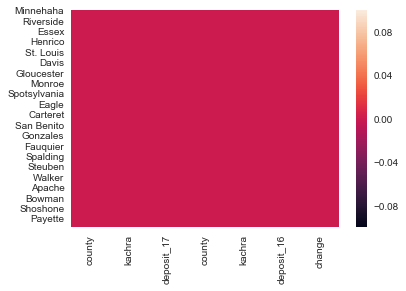

In [48]:
bb = bb.drop(bb[(bb.deposit_17 == 0) | (bb.deposit_16==0)].index)
bb['change'] = (bb.deposit_17 - bb.deposit_16)/ bb.deposit_17
    
bb  
sb.heatmap(bb.isnull())

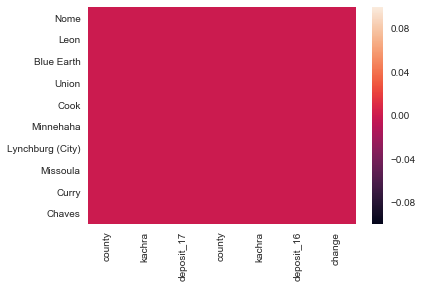

In [49]:
tpc = bb.sort_values('change',ascending = False).head(10)
tpc
sb.heatmap(tpc.isnull())

In [50]:
sb.barplot(x="change", y="county", data=tpc).set_title('county')

TypeError: cannot label index with a null key

In [29]:
yy = df_tp_mw.sort_values('DEPSUMBR',ascending = False).groupby(['CNTYNAMB']).head(5)
yy.head(25)

,YEAR,CERT,BRNUM,UNINUMBR,NAMEFULL,ADDRESBR,CITYBR,CNTYNAMB,STALPBR,ZIPBR,BRCENM,CONSOLD,BRSERTYP,DEPSUMBR,BKMO,CBSA_DIV_NAMB,CITY2BR,CNTRYNAB,CNTYNUMB,CSABR,CSANAMBR,DIVISIONB,MSABR,MSANAMB,Metrobr,Microbr,NAMEBR,NECTABR,NECNAMB,PLACENUM,SIMS_ACQUIRED_DATE,SIMS_ESTABLISHED_DATE,SIMS_LATITUDE,SIMS_LONGITUDE,SIMS_DESCRIPTION,SIMS_PROJECTION,STCNTYBR,STNAMEBR,STNUMBR,HCTMULT,RSSDHCR,NAMEHCR,CITYHCR,STALPHCR,RSSDID,UNIT,ADDRESS,CITY,STALP,ZIP,ASSET,BKCLASS,CALL,CHARTER,CHRTAGNN,CHRTAGNT,CLCODE,CNTRYNA,DENOVO,DEPDOM,DEPSUM,DOCKET,ESCROW,FDICDBS,FDICNAME,FED,FEDNAME,INSAGNT1,INSURED,INSBRDD,INSBRTS,OCCDIST,OCCNAME,REGAGNT,SPECGRP,SPECDESC,STCNTY,STNAME,USA
18226,2017,3511,0,2239,"Wells Fargo Bank, National Association",101 N. Phillips Avenue,Sioux Falls,Minnehaha,SD,57104,M,NaN,11,260594647,1,NaN,Sioux Falls,United States,99,0,NaN,0,43620,"Sioux Falls, SD",1,0,"Wells Fargo Bank, National Association",0,NaN,0.0,NaN,01/01/1870,43.5476,-96.7268,POINTADDRESS,100,46099,South Dakota,46,MULT,1120754,WELLS FARGO & COMPANY,SAN FRANCISCO,CA,451965,0.0,101 N. Phillips Avenue,Sioux Falls,SD,57104,1731937000,N,CALL,FED,Comptroller of the Currency,OCC,3,United States,0.0,1237791000,1237791000,0,NaN,11,Kansas City,9,Minneapolis,DIF,CB,NaN,NaN,4,Midwest District,OCC,9,ALL OTHER > $1 BILLION,46099,South Dakota,1
18226,2017,3511,0,2239,"Wells Fargo Bank, National Association",101 N. Phillips Avenue,Sioux Falls,Minnehaha,SD,57104,M,NaN,11,260594647,1,NaN,Sioux Falls,United States,99,0,NaN,0,43620,"Sioux Falls, SD",1,0,"Wells Fargo Bank, National Association",0,NaN,0.0,NaN,01/01/1870,43.5476,-96.7268,POINTADDRESS,100,46099,South Dakota,46,MULT,1120754,WELLS FARGO & COMPANY,SAN FRANCISCO,CA,451965,0.0,101 N. Phillips Avenue,Sioux Falls,SD,57104,1731937000,N,CALL,FED,Comptroller of the Currency,OCC,3,United States,0.0,1237791000,1237791000,0,NaN,11,Kansas City,9,Minneapolis,DIF,CB,NaN,NaN,4,Midwest District,OCC,9,ALL OTHER > $1 BILLION,46099,South Dakota,1
18525,2016,3511,0,2239,"Wells Fargo Bank, National Association",101 N. Phillips Avenue,Sioux Falls,Minnehaha,SD,57104,M,NaN,11,191611235,1,NaN,Sioux Falls,United States,99,0,NaN,0,43620,"Sioux Falls, SD",1,0,"Wells Fargo Bank, National Association",0,NaN,59020.0,NaN,01/01/1870,43.5476,-96.7268,POINTADDRESS,100,46099,South Dakota,46,MULT,1120754,WELLS FARGO & COMPANY,SAN FRANCISCO,CA,451965,0.0,101 N. Phillips Avenue,Sioux Falls,SD,57104,1699435000,N,CALL,FED,Comptroller of the Currency,OCC,3,United States,0.0,1145337000,1145337000,0,NaN,11,Kansas City,9,Minneapolis,DIF,CB,NaN,NaN,4,Midwest District,OCC,9,ALL OTHER > $1 BILLION,46099,South Dakota,1
18525,2016,3511,0,2239,"Wells Fargo Bank, National Association",101 N. Phillips Avenue,Sioux Falls,Minnehaha,SD,57104,M,NaN,11,191611235,1,NaN,Sioux Falls,United States,99,0,NaN,0,43620,"Sioux Falls, SD",1,0,"Wells Fargo Bank, National Association",0,NaN,59020.0,NaN,01/01/1870,43.5476,-96.7268,POINTADDRESS,100,46099,South Dakota,46,MULT,1120754,WELLS FARGO & COMPANY,SAN FRANCISCO,CA,451965,0.0,101 N. Phillips Avenue,Sioux Falls,SD,57104,1699435000,N,CALL,FED,Comptroller of the Currency,OCC,3,United States,0.0,1145337000,1145337000,0,NaN,11,Kansas City,9,Minneapolis,DIF,CB,NaN,NaN,4,Midwest District,OCC,9,ALL OTHER > $1 BILLION,46099,South Dakota,1
24280,2016,3511,4360,3497,"Wells Fargo Bank, National Association",90 South 7th Street,Minneapolis,Hennepin,MN,55402,NaN,NaN,11,59505408,0,NaN,Minneapolis,United States,53,378,"Minneapolis-St. Paul, MN-WI",0,33460,"Minneapolis-St. Paul-Bloomington, MN-WI",1,0,Wells Fargo Center Skyway Branch,0,NaN,43000.0,02/20/2004,01/01/1872,44.9764,-93.2711,STREETADDRESS,100,27053,Minnesota,27,MULT,1120754,WELLS FARGO & COMPANY,SAN FRANCISCO,CA,451965,0.0,101 N. Phillips Avenue,Sioux Falls,SD,57104,1699435000,N,CALL,FED,Comptroller of the Currency,OCC,3,United States,0.0,1145337000,0,0,NaN,11,Kansas City,9,Minneapolis,DIF,CB,NaN,NaN,4,Midwest District,OCC,9,ALL OTHER > $1 BILLION,46099,South Dakota,1
24280,2016,3511,4360,3497,"W

# All States All Deposits - 2013 - 2017

In [ ]:

sd = df.groupby('STALPBR')
player_dict = {}
#d = pd.DataFrame
for name,group in sd:
        
        
        State         = name
        Deposit       = group.DEPSUMBR.sum()
        
        
         
    
        player_dict[name] = [
             State,
                            Deposit]
        
        new_df = pd.DataFrame(player_dict)


        print(  
            'State '+str(State)
                 + ' Deposit '+str(Deposit)
                 )
                 


In [ ]:
T1 = new_df.T
T1.rename(columns={0: 'State',
                          1: 'Deposit'}, inplace=True)
T1.sort_values('Deposit',ascending=False,inplace=True)
T1.head(10)

In [ ]:
sb.barplot(x="State", y="Deposit", data=T1).set_title('Deposits')

In [ ]:
top_10 = df.sort_values('DEPSUMBR',ascending = False).groupby('STALPBR').head(10)
top_10

# State wise, city wise, county wise, identify risky states

In [43]:
state_analysis_17 = df_17.groupby('CNTYNAMB')
state_analysis_16 = df_16.groupby('CNTYNAMB')

state_dict = {}
#d = pd.DataFrame
for name,group in state_analysis_17:
        
        State            = name
        Deposit_17       = group.DEPSUMBR.sum()
        
        
for name,group in state_analysis_16:
        
        State            = name
        Deposit_16       = group.DEPSUMBR.sum()
        
        
        change = (Deposit_17 -  Deposit_16)/Deposit_17         
    
        state_dict[name] = [ 
                             Deposit_17,
                             
                             Deposit_16,
                             change]
        
        state_report = pd.DataFrame(state_dict)





        print(   
                   ' State   '+ str(State)
                 + ' Deposit_17 '+ str(Deposit_17)
                 + ' Deposit_16 '+ str(Deposit_16)
                 + ' Pct_change '+ str(change)) 
                
                

 State   Abbeville Deposit_17 969294 Deposit_16 429076 Pct_change 0.557331418537616
 State   Acadia Deposit_17 969294 Deposit_16 1756376 Pct_change -0.8120157557975186
 State   Accomack Deposit_17 969294 Deposit_16 883760 Pct_change 0.08824360823444692
 State   Ada Deposit_17 969294 Deposit_16 15908910 Pct_change -15.412884016614154
 State   Adair Deposit_17 969294 Deposit_16 2671604 Pct_change -1.756237013744024
 State   Adams Deposit_17 969294 Deposit_16 20746670 Pct_change -20.40389809490206
 State   Addison Deposit_17 969294 Deposit_16 1159206 Pct_change -0.195928170400312
 State   Adjuntas Deposit_17 969294 Deposit_16 64000 Pct_change 0.9339725614725769
 State   Aguada Deposit_17 969294 Deposit_16 271362 Pct_change 0.7200415972862723
 State   Aguadilla Deposit_17 969294 Deposit_16 919856 Pct_change 0.05100413290498033
 State   Aguas Buenas Deposit_17 969294 Deposit_16 76000 Pct_change 0.9215924167486851
 State   Aibonito Deposit_17 969294 Deposit_16 176934 Pct_change 0.81746095611

 State   Bath Deposit_17 969294 Deposit_16 430044 Pct_change 0.5563327535298888
 State   Baxter Deposit_17 969294 Deposit_16 1907624 Pct_change -0.9680550998974511
 State   Bay Deposit_17 969294 Deposit_16 7219730 Pct_change -6.448441855618626
 State   Bayamon Deposit_17 969294 Deposit_16 4096852 Pct_change -3.2266350560304717
 State   Bayfield Deposit_17 969294 Deposit_16 528124 Pct_change 0.4551457039866129
 State   Baylor Deposit_17 969294 Deposit_16 172382 Pct_change 0.82215715768384
 State   Beadle Deposit_17 969294 Deposit_16 696902 Pct_change 0.28102103180252846
 State   Bear Lake Deposit_17 969294 Deposit_16 228774 Pct_change 0.7639787309113644
 State   Beaufort Deposit_17 969294 Deposit_16 9612362 Pct_change -8.91686939153652
 State   Beauregard Deposit_17 969294 Deposit_16 867584 Pct_change 0.1049320433222531
 State   Beaver Deposit_17 969294 Deposit_16 4891936 Pct_change -4.0469063050013725
 State   Beaverhead Deposit_17 969294 Deposit_16 448680 Pct_change 0.5371063887736848

 State   Carson Deposit_17 969294 Deposit_16 232470 Pct_change 0.7601656463364057
 State   Carson City Deposit_17 969294 Deposit_16 2498450 Pct_change -1.5775977154506269
 State   Carter Deposit_17 969294 Deposit_16 4662718 Pct_change -3.8104269705579523
 State   Carteret Deposit_17 969294 Deposit_16 2086328 Pct_change -1.1524202151256482
 State   Carver Deposit_17 969294 Deposit_16 3726330 Pct_change -2.844375390748318
 State   Cascade Deposit_17 969294 Deposit_16 2784732 Pct_change -1.87294876477106
 State   Casey Deposit_17 969294 Deposit_16 430504 Pct_change 0.5558581813154729
 State   Cass Deposit_17 969294 Deposit_16 21142990 Pct_change -20.81277300798313
 State   Cassia Deposit_17 969294 Deposit_16 758122 Pct_change 0.21786166013614033
 State   Castro Deposit_17 969294 Deposit_16 284092 Pct_change 0.7069083270916771
 State   Caswell Deposit_17 969294 Deposit_16 114340 Pct_change 0.8820378543558508
 State   Catahoula Deposit_17 969294 Deposit_16 312488 Pct_change 0.67761277796004

 State   Coleman Deposit_17 969294 Deposit_16 325542 Pct_change 0.6641452438579007
 State   Coles Deposit_17 969294 Deposit_16 2072008 Pct_change -1.1376465757551373
 State   Colfax Deposit_17 969294 Deposit_16 1201970 Pct_change -0.24004687948135447
 State   Colleton Deposit_17 969294 Deposit_16 817740 Pct_change 0.15635503779039178
 State   Collier Deposit_17 969294 Deposit_16 30878920 Pct_change -30.85712487645647
 State   Collin Deposit_17 969294 Deposit_16 46927600 Pct_change -47.41420662874216
 State   Collingsworth Deposit_17 969294 Deposit_16 153146 Pct_change 0.8420025296762386
 State   Colonial Heights (City) Deposit_17 969294 Deposit_16 1410402 Pct_change -0.4550817399055395
 State   Colorado Deposit_17 969294 Deposit_16 1169730 Pct_change -0.20678555732316511
 State   Colquitt Deposit_17 969294 Deposit_16 1327924 Pct_change -0.369990941860777
 State   Columbia Deposit_17 969294 Deposit_16 13958976 Pct_change -13.401178589777714
 State   Columbiana Deposit_17 969294 Deposit_

 State   Des Moines Deposit_17 969294 Deposit_16 2124182 Pct_change -1.191473381657165
 State   Deschutes Deposit_17 969294 Deposit_16 6469898 Pct_change -5.674856132401521
 State   Desha Deposit_17 969294 Deposit_16 537126 Pct_change 0.4458585320862401
 State   Deuel Deposit_17 969294 Deposit_16 317784 Pct_change 0.6721490074218968
 State   Dewey Deposit_17 969294 Deposit_16 605340 Pct_change 0.375483599403277
 State   Dickens Deposit_17 969294 Deposit_16 78500 Pct_change 0.9190132199312077
 State   Dickenson Deposit_17 969294 Deposit_16 392638 Pct_change 0.5949237279917136
 State   Dickey Deposit_17 969294 Deposit_16 296538 Pct_change 0.6940680536555472
 State   Dickinson Deposit_17 969294 Deposit_16 3322932 Pct_change -2.4281982556376085
 State   Dickson Deposit_17 969294 Deposit_16 1747558 Pct_change -0.8029184127829121
 State   Dillingham Deposit_17 969294 Deposit_16 113646 Pct_change 0.8827538393923825
 State   Dillon Deposit_17 969294 Deposit_16 556264 Pct_change 0.4261142646090

 State   Flagler Deposit_17 969294 Deposit_16 2989206 Pct_change -2.083900240793815
 State   Flathead Deposit_17 969294 Deposit_16 3887832 Pct_change -3.010993568514816
 State   Fleming Deposit_17 969294 Deposit_16 551254 Pct_change 0.43128297503131147
 State   Florence Deposit_17 969294 Deposit_16 4688942 Pct_change -3.8374817134945642
 State   Florida Deposit_17 969294 Deposit_16 32000 Pct_change 0.9669862807362885
 State   Floyd Deposit_17 969294 Deposit_16 8279984 Pct_change -7.542283352625725
 State   Fluvanna Deposit_17 969294 Deposit_16 240138 Pct_change 0.7522547338578388
 State   Foard Deposit_17 969294 Deposit_16 64836 Pct_change 0.9331100780568125
 State   Fond du Lac Deposit_17 969294 Deposit_16 4121522 Pct_change -3.252086570225339
 State   Ford Deposit_17 969294 Deposit_16 2016196 Pct_change -1.0800665226443165
 State   Forest Deposit_17 969294 Deposit_16 385002 Pct_change 0.6028016267510167
 State   Forrest Deposit_17 969294 Deposit_16 3039852 Pct_change -2.136150641601


 State   Grenada Deposit_17 969294 Deposit_16 759398 Pct_change 0.21654523808049983
 State   Griggs Deposit_17 969294 Deposit_16 226102 Pct_change 0.7667353764698842
 State   Grimes Deposit_17 969294 Deposit_16 849686 Pct_change 0.12339702917793775
 State   Grundy Deposit_17 969294 Deposit_16 3976212 Pct_change -3.102173334406279
 State   Guadalupe Deposit_17 969294 Deposit_16 2785356 Pct_change -1.8735925322967026
 State   Guam Deposit_17 969294 Deposit_16 5163304 Pct_change -4.326870897787462
 State   Guayama Deposit_17 969294 Deposit_16 507962 Pct_change 0.4759464104802052
 State   Guayanilla Deposit_17 969294 Deposit_16 90000 Pct_change 0.9071489145708114
 State   Guaynabo Deposit_17 969294 Deposit_16 3558954 Pct_change -2.671697132139475
 State   Guernsey Deposit_17 969294 Deposit_16 1140540 Pct_change -0.17667085528229826
 State   Guilford Deposit_17 969294 Deposit_16 18585912 Pct_change -18.174690032126474
 State   Gulf Deposit_17 969294 Deposit_16 348896 Pct_change 0.6400514188

 State   Hot Springs Deposit_17 969294 Deposit_16 250884 Pct_change 0.7411683142575937
 State   Houghton Deposit_17 969294 Deposit_16 1341120 Pct_change -0.3836049743421501
 State   Houston Deposit_17 969294 Deposit_16 9563416 Pct_change -8.86637284456522
 State   Howard Deposit_17 969294 Deposit_16 18947374 Pct_change -18.547602688142092
 State   Howell Deposit_17 969294 Deposit_16 1607710 Pct_change -0.6586402061706768
 State   Hubbard Deposit_17 969294 Deposit_16 737654 Pct_change 0.2389780603201918
 State   Hudson Deposit_17 969294 Deposit_16 59900254 Pct_change -60.79781779315667
 State   Hudspeth Deposit_17 969294 Deposit_16 34926 Pct_change 0.9639675887811129
 State   Huerfano Deposit_17 969294 Deposit_16 171752 Pct_change 0.8228071152818444
 State   Hughes Deposit_17 969294 Deposit_16 2084694 Pct_change -1.150734452085745
 State   Humacao Deposit_17 969294 Deposit_16 1042648 Pct_change -0.07567776133969673
 State   Humboldt Deposit_17 969294 Deposit_16 4354396 Pct_change -3.492

 State   Kershaw Deposit_17 969294 Deposit_16 1405260 Pct_change -0.44977684789135186
 State   Ketchikan Gateway Deposit_17 969294 Deposit_16 1027088 Pct_change -0.059624840347717
 State   Kewaunee Deposit_17 969294 Deposit_16 834910 Pct_change 0.13864111404795657
 State   Keweenaw Deposit_17 969294 Deposit_16 35206 Pct_change 0.9636787187375554
 State   Keya Paha Deposit_17 969294 Deposit_16 30716 Pct_change 0.9683109562217449
 State   Kidder Deposit_17 969294 Deposit_16 156950 Pct_change 0.8380780237987648
 State   Kimball Deposit_17 969294 Deposit_16 235584 Pct_change 0.7569529987805558
 State   Kimble Deposit_17 969294 Deposit_16 190190 Pct_change 0.8037850229135846
 State   King Deposit_17 969294 Deposit_16 152876834 Pct_change -156.71977748753216
 State   King George Deposit_17 969294 Deposit_16 332364 Pct_change 0.6571071315823682
 State   King William Deposit_17 969294 Deposit_16 557860 Pct_change 0.424467705360809
 State   King and Queen Deposit_17 969294 Deposit_16 37736 Pct_

 State   Little River Deposit_17 969294 Deposit_16 214078 Pct_change 0.7791402814832239
 State   Live Oak Deposit_17 969294 Deposit_16 673718 Pct_change 0.30493947140908745
 State   Livingston Deposit_17 969294 Deposit_16 12355472 Pct_change -11.746877624332761
 State   Llano Deposit_17 969294 Deposit_16 987130 Pct_change -0.018401021774611212
 State   Logan Deposit_17 969294 Deposit_16 7235570 Pct_change -6.464783646654163
 State   Loiza Deposit_17 969294 Deposit_16 28000 Pct_change 0.9711129956442525
 State   Long Deposit_17 969294 Deposit_16 85954 Pct_change 0.9113230867002169
 State   Lonoke Deposit_17 969294 Deposit_16 1786042 Pct_change -0.8426215369124331
 State   Lorain Deposit_17 969294 Deposit_16 8439214 Pct_change -7.7065575563245
 State   Los Alamos Deposit_17 969294 Deposit_16 1586284 Pct_change -0.6365354577661679
 State   Los Angeles Deposit_17 969294 Deposit_16 764741168 Pct_change -787.9671946798392
 State   Loudon Deposit_17 969294 Deposit_16 1319960 Pct_change -0.361

 State   Meade Deposit_17 969294 Deposit_16 1524402 Pct_change -0.5726931147825118
 State   Meagher Deposit_17 969294 Deposit_16 68622 Pct_change 0.9292041423964246
 State   Mecklenburg Deposit_17 969294 Deposit_16 373550918 Pct_change -384.3845355485539
 State   Mecosta Deposit_17 969294 Deposit_16 890332 Pct_change 0.08146341564066217
 State   Medina Deposit_17 969294 Deposit_16 8452188 Pct_change -7.719942556128482
 State   Meeker Deposit_17 969294 Deposit_16 819700 Pct_change 0.15433294748548945
 State   Meigs Deposit_17 969294 Deposit_16 673740 Pct_change 0.30491677447709364
 State   Menard Deposit_17 969294 Deposit_16 574378 Pct_change 0.40742643614837193
 State   Mendocino Deposit_17 969294 Deposit_16 3089752 Pct_change -2.1876314100778504
 State   Menifee Deposit_17 969294 Deposit_16 66398 Pct_change 0.9314985958852525
 State   Menominee Deposit_17 969294 Deposit_16 432568 Pct_change 0.5537287964229635
 State   Merced Deposit_17 969294 Deposit_16 4216630 Pct_change -3.350207470

 State   Ness Deposit_17 969294 Deposit_16 253778 Pct_change 0.7381826360216818
 State   Nevada Deposit_17 969294 Deposit_16 4092182 Pct_change -3.2218171163754237
 State   New Castle Deposit_17 969294 Deposit_16 601604140 Pct_change -619.6621933077064
 State   New Hanover Deposit_17 969294 Deposit_16 11126844 Pct_change -10.479328253347282
 State   New Haven Deposit_17 969294 Deposit_16 55367132 Pct_change -56.12109225890184
 State   New Kent Deposit_17 969294 Deposit_16 394114 Pct_change 0.5934009701906748
 State   New London Deposit_17 969294 Deposit_16 9511936 Pct_change -8.813262023699723
 State   New Madrid Deposit_17 969294 Deposit_16 609548 Pct_change 0.37114229532009896
 State   New York Deposit_17 969294 Deposit_16 2050276166 Pct_change -2114.2263049188377
 State   Newaygo Deposit_17 969294 Deposit_16 642238 Pct_change 0.33741671773476367
 State   Newberry Deposit_17 969294 Deposit_16 965198 Pct_change 0.004225756065755076
 State   Newport Deposit_17 969294 Deposit_16 3125700

 State   Parke Deposit_17 969294 Deposit_16 371286 Pct_change 0.6169521321704251
 State   Parker Deposit_17 969294 Deposit_16 3717896 Pct_change -2.835674212364876
 State   Parmer Deposit_17 969294 Deposit_16 520090 Pct_change 0.4634342108792585
 State   Pasco Deposit_17 969294 Deposit_16 10382222 Pct_change -9.7111175762978
 State   Pasquotank Deposit_17 969294 Deposit_16 1334720 Pct_change -0.37700223048940773
 State   Passaic Deposit_17 969294 Deposit_16 26233242 Pct_change -26.064277711406447
 State   Patillas Deposit_17 969294 Deposit_16 88000 Pct_change 0.9092122720247933
 State   Patrick Deposit_17 969294 Deposit_16 497520 Pct_change 0.48671919974744504
 State   Paulding Deposit_17 969294 Deposit_16 2576292 Pct_change -1.6579056509170593
 State   Pawnee Deposit_17 969294 Deposit_16 863024 Pct_change 0.10963649831733199
 State   Payette Deposit_17 969294 Deposit_16 534558 Pct_change 0.44850788305715295
 State   Payne Deposit_17 969294 Deposit_16 3460216 Pct_change -2.569831237993

 State   Quebradillas Deposit_17 969294 Deposit_16 138000 Pct_change 0.857628335675244
 State   Queen Anne's Deposit_17 969294 Deposit_16 1866596 Pct_change -0.925727385086465
 State   Queens Deposit_17 969294 Deposit_16 119096232 Pct_change -121.86904901918304
 State   Quitman Deposit_17 969294 Deposit_16 152488 Pct_change 0.8426813742785987
 State   Rabun Deposit_17 969294 Deposit_16 804870 Pct_change 0.16963274300676576
 State   Racine Deposit_17 969294 Deposit_16 6020378 Pct_change -5.211095911044533
 State   Radford (City) Deposit_17 969294 Deposit_16 667278 Pct_change 0.3115834824109094
 State   Rains Deposit_17 969294 Deposit_16 314114 Pct_change 0.6759352683499537
 State   Raleigh Deposit_17 969294 Deposit_16 2337722 Pct_change -1.4117780570188199
 State   Ralls Deposit_17 969294 Deposit_16 178716 Pct_change 0.8156225046270791
 State   Ramsey Deposit_17 969294 Deposit_16 95386418 Pct_change -97.40813829446999
 State   Randall Deposit_17 969294 Deposit_16 3414984 Pct_change -2.5

 State   San German Deposit_17 969294 Deposit_16 396636 Pct_change 0.5907990764412036
 State   San Jacinto Deposit_17 969294 Deposit_16 292390 Pct_change 0.6983474570151058
 State   San Joaquin Deposit_17 969294 Deposit_16 18532492 Pct_change -18.119577754530617
 State   San Juan Deposit_17 969294 Deposit_16 104746866 Pct_change -107.06511337117531
 State   San Lorenzo Deposit_17 969294 Deposit_16 228752 Pct_change 0.7640014278433581
 State   San Luis Obispo Deposit_17 969294 Deposit_16 12228242 Pct_change -11.615617139897699
 State   San Mateo Deposit_17 969294 Deposit_16 68633066 Pct_change -69.80727416036827
 State   San Miguel Deposit_17 969294 Deposit_16 965296 Pct_change 0.004124651550509959
 State   San Patricio Deposit_17 969294 Deposit_16 1318578 Pct_change -0.36034887247831926
 State   San Saba Deposit_17 969294 Deposit_16 227938 Pct_change 0.7648412143271288
 State   San Sebastian Deposit_17 969294 Deposit_16 504170 Pct_change 0.479858536212955
 State   Sanborn Deposit_17 96

 State   St. Clair Deposit_17 969294 Deposit_16 13227882 Pct_change -12.646924462546966
 State   St. Claire Deposit_17 969294 Deposit_16 327934 Pct_change 0.6616774683429383
 State   St. Croix Deposit_17 969294 Deposit_16 3214954 Pct_change -2.316799650054576
 State   St. Francis Deposit_17 969294 Deposit_16 687490 Pct_change 0.2907311919809676
 State   St. Francois Deposit_17 969294 Deposit_16 1859444 Pct_change -0.9183488188310255
 State   St. Helena Deposit_17 969294 Deposit_16 112622 Pct_change 0.8838102784088213
 State   St. James Deposit_17 969294 Deposit_16 814318 Pct_change 0.15988544239415492
 State   St. John Deposit_17 969294 Deposit_16 185472 Pct_change 0.808652483147528
 State   St. John the Baptist Deposit_17 969294 Deposit_16 845970 Pct_change 0.12723074732743625
 State   St. Johns Deposit_17 969294 Deposit_16 7759570 Pct_change -7.0053832995974386
 State   St. Joseph Deposit_17 969294 Deposit_16 9498426 Pct_change -8.799324044098075
 State   St. Landry Deposit_17 969294

 State   Tillman Deposit_17 969294 Deposit_16 272714 Pct_change 0.7186467676473804
 State   Tioga Deposit_17 969294 Deposit_16 2345966 Pct_change -1.4202832164441335
 State   Tippah Deposit_17 969294 Deposit_16 806532 Pct_change 0.16791809296250673
 State   Tippecanoe Deposit_17 969294 Deposit_16 4887112 Pct_change -4.041929486822368
 State   Tipton Deposit_17 969294 Deposit_16 1541124 Pct_change -0.589944846455255
 State   Tishomingo Deposit_17 969294 Deposit_16 605290 Pct_change 0.3755351833396266
 State   Titus Deposit_17 969294 Deposit_16 1294590 Pct_change -0.3356009631752595
 State   Toa Alta Deposit_17 969294 Deposit_16 144908 Pct_change 0.8505014990291904
 State   Toa Baja Deposit_17 969294 Deposit_16 271828 Pct_change 0.7195608349994945
 State   Todd Deposit_17 969294 Deposit_16 1318314 Pct_change -0.36007650929439367
 State   Tolland Deposit_17 969294 Deposit_16 6411366 Pct_change -5.614469913153285
 State   Tom Green Deposit_17 969294 Deposit_16 4642584 Pct_change -3.7896551

 State   Walton Deposit_17 969294 Deposit_16 4103470 Pct_change -3.233462705845698
 State   Walworth Deposit_17 969294 Deposit_16 3976496 Pct_change -3.1024663311647447
 State   Wapello Deposit_17 969294 Deposit_16 935712 Pct_change 0.03464583500981126
 State   Ward Deposit_17 969294 Deposit_16 5283392 Pct_change -4.450763132754355
 State   Ware Deposit_17 969294 Deposit_16 1355156 Pct_change -0.39808561695419553
 State   Warren Deposit_17 969294 Deposit_16 27874718 Pct_change -27.757753581472702
 State   Warrick Deposit_17 969294 Deposit_16 1480780 Pct_change -0.5276892253537111
 State   Wasatch Deposit_17 969294 Deposit_16 542314 Pct_change 0.4405061828506109
 State   Wasco Deposit_17 969294 Deposit_16 845334 Pct_change 0.12788689499780254
 State   Waseca Deposit_17 969294 Deposit_16 823710 Pct_change 0.1501959157902556
 State   Washakie Deposit_17 969294 Deposit_16 477064 Pct_change 0.5078232197867727
 State   Washburn Deposit_17 969294 Deposit_16 558490 Pct_change 0.423817747762804

 State   Yates Deposit_17 969294 Deposit_16 711672 Pct_change 0.2657831370048716
 State   Yauco Deposit_17 969294 Deposit_16 506494 Pct_change 0.47746091485142794
 State   Yavapai Deposit_17 969294 Deposit_16 7391604 Pct_change -6.625760605141474
 State   Yazoo Deposit_17 969294 Deposit_16 709718 Pct_change 0.267799037237412
 State   Yell Deposit_17 969294 Deposit_16 705476 Pct_change 0.27217541839730774
 State   Yellow Medicine Deposit_17 969294 Deposit_16 716488 Pct_change 0.260814572255683
 State   Yellowstone Deposit_17 969294 Deposit_16 9042478 Pct_change -8.32893219188399
 State   Yoakum Deposit_17 969294 Deposit_16 400974 Pct_change 0.5863236541235167
 State   Yolo Deposit_17 969294 Deposit_16 6325982 Pct_change -5.526381056727886
 State   York Deposit_17 969294 Deposit_16 28339746 Pct_change -28.237513076527865
 State   Young Deposit_17 969294 Deposit_16 1094774 Pct_change -0.1294550466628288
 State   Yuba Deposit_17 969294 Deposit_16 729620 Pct_change 0.24726656721283738
 Stat

In [44]:
plot_state_report = state_report.T
plot_state_report.head(60)


,0,1,2
Abbeville,969294.0,429076.0,0.557331
Acadia,969294.0,1756376.0,-0.812016
Accomack,969294.0,883760.0,0.088244
Ada,969294.0,15908910.0,-15.412884
Adair,969294.0,2671604.0,-1.756237
Adams,969294.0,20746670.0,-20.403898
Addison,969294.0,1159206.0,-0.195928
Adjuntas,969294.0,64000.0,0.933973
Aguada,969294.0,271362.0,0.720042
Aguadilla,969294.0,919856.0,0.051004


In [45]:
plot_state_report.rename(columns={0: 'Year_2017_Deposit', 1: 'Year_2016_Deposit', 2: 'Pct_change'},inplace=True)

In [46]:
fd = plot_state_report.reset_index()
fd.rename(columns = {'index':'State'},inplace=True)
fd.head(60)

,State,Year_2017_Deposit,Year_2016_Deposit,Pct_change
0,Abbeville,969294.0,429076.0,0.557331
1,Acadia,969294.0,1756376.0,-0.812016
2,Accomack,969294.0,883760.0,0.088244
3,Ada,969294.0,15908910.0,-15.412884
4,Adair,969294.0,2671604.0,-1.756237
5,Adams,969294.0,20746670.0,-20.403898
6,Addison,969294.0,1159206.0,-0.195928
7,Adjuntas,969294.0,64000.0,0.933973
8,Aguada,969294.0,271362.0,0.720042
9,Aguadilla,969294.0,919856.0,0.051004


In [47]:
sb.barplot(x="State", y="Pct_change", hue="State", data=fd)

KeyboardInterrupt: 

In [ ]:
state_report.head(60)